<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/%EC%8A%A4%ED%84%B0%EB%94%94_3%EC%B0%A8_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C%2C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#차원축소
매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터를 생성하는 것! 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다.

일반적으로 차원 축소는 피처 선택, 피처 추출로 나뉨.
- 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것.
- 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것. 기존의 피처와는 완전히 다른 값이 된다.

피처 추출은 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것. ex) 모의고사 성적, 종합 내신성적, 수능성적, 봉사활동, 대외활동 -> 학업 성취도, 커뮤니케이션 능력, 문제 해결력. 이러한 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소를 추출하는 것을 의미.

##PCA (Principal Component Analysis)
여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법. 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.

붓꽃 데이터 세트의 4개 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 어떻게 달라지는지 보자.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터 세트를 판다스 DF로 변환
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target

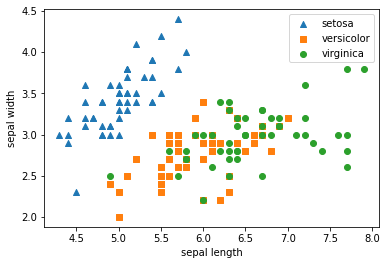

In [ ]:
#sepal을 시각화해보자

markers=['^', 's', 'o']

#setosa의 타깃값은 0, versicolor는 1, virginica는 2. 각 타깃 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- 구분이 어려워보이는 versicolor와 virginica.
- 4개 속성을 2개로 압축한 뒤 다시 시각화해보자.

바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링 해야함.

In [ ]:
from sklearn.preprocessing import StandardScaler

#타깃값을 제외한 모든 속성 값을 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

#fit과 transform 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
#PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명.
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target

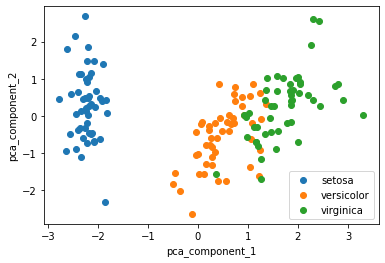

In [ ]:
markers=['^', 's', 'o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, maker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- 이전보다는 구분이 나아졌다.

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- component별로 원본 데이터의 변동성을 얼마나 설명하고 있는지 보니 1이 72,9%.
- 두개 요소로만 변환해도 95%는 설명가능하다는 것.

원본 데이터와 PCA 변환된 데이터 세트에 각각 분류를 적용한 뒤 결과를 비교해보자.

In [ ]:
# 원본

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
# pca 변환

pca_X=irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 속성이 감소했으니 예측 성능은 떨어지는게 당연.
- 하지만 속성을 반으로 줄인 것에 비해 10%만 감소한거면 상당 부분을 유지하고 있다는 것.

### 실습 (default of credit card clients data set)
24개의 속성을 가진 데이터 세트로 실습해보자.

In [ ]:
import pandas as pd

df=pd.read_excel('credit_card.xlsx', header=1, sheet_name='Data').iloc[0:, 1:]

In [ ]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target=df['default']
X_features=df.drop('default', axis=1)

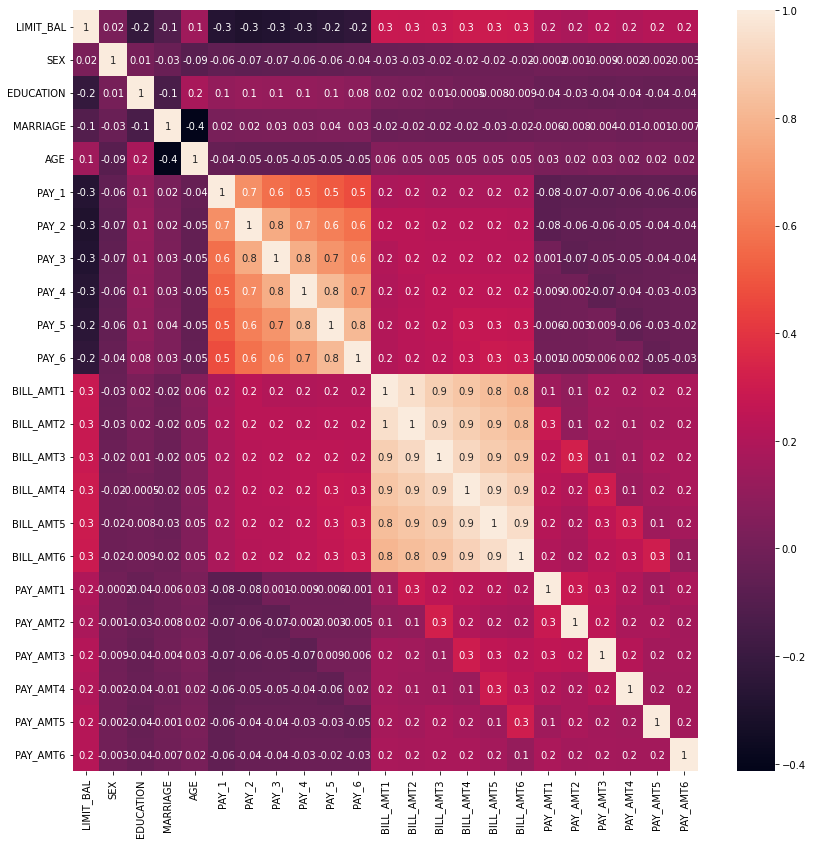

In [ ]:
#속성끼리 상관도 보자

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- 상관도가 높은 속성들은 소수의 PCA만으로도 자연스럽게 속성들의 변동성을 수용할 수 있다.
- BILL_AMT1~6의 6개 속성을 2개로 PCA 변환하자.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Bill_amt1부터 6까지 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 2개만으로 6개 속성의 95%를 설명 가능.
- 그렇다면 원본과 변환 데이터의 분류 예측 결과를 비교해보자.

In [ ]:
# 원본

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [ ]:
# PCA 변환

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#원본 데이터 세트에 먼저 standardscaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_scre()로 분류 예측 수행.
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 fold 세트별 정확도: [0.7918 0.7978 0.8013]
PCA 변환 데이터 세트 평균 정확도:0.796967


- 23개 속성에서 6개로 줄이니 예측 성능이 아주 약간만 줄어들었다.

##LDA (Linear Discriminant Analysis)
선형 판별 분석법. 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 차원을 축소한다.

붓꽃 데이터로 실습해보자.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

- 2개 컴포넌트로 LDA 변환하자.

In [ ]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda=lda.transform(iris_scaled)

- 이때 LDA는 지도학습이라 클래스의 결정값이 필요하다. fit에 입력되었다.

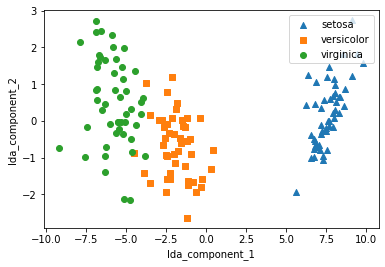

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

#setosa 타깃 값은 0, versicolor는 1, virginica는 2, 각 타깃 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

##SVD (Singular Value Decomposition)

붓꽃 데이터 세트를 TruncatedSVD를 이용해 변환해보자.

Text(0, 0.5, 'TruncatedSVD component 2')

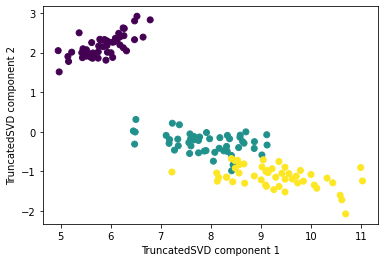

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
#2개의 주요 컴포넌트로 truncatedSVD로 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

#산점도 2차원으로 truncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD component 1')
plt.ylabel('TruncatedSVD component 2')

- 위에서 봤던 PCA와 비교해보자. TruncatedSVD 역시 어느 정도 분류가 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가진다.
- 스케일링으로 변환한 것도 보자.

Text(0.5, 1.0, 'PCA 변환')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0, flags=flags)


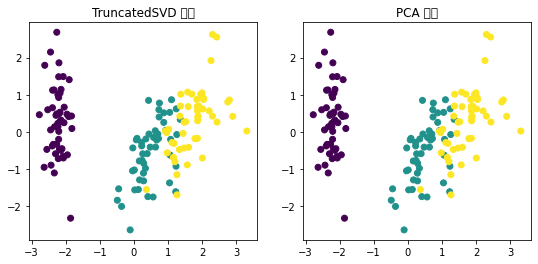

In [ ]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 standardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

#스케일링된 데이터 기반으로 truncatedSVD 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

#스케일링된 데이터 기반으로 pca 수행
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

#truncatedSVD 변환 데이터를 왼쪽에, pca 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2)=plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('TruncatedSVD 변환')
ax2.set_title('PCA 변환')

- 비슷!
- 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 SVD와 PCA는 동일한 변환을 수행한다.

##NMF (Non-Negative Matrix Factorization)

붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 시각화해보자.

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

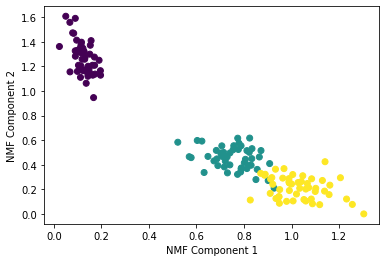

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

## 정리 (활용)
- PCA : 차원 축소를 통해 데이터를 쉽게 인지하는데 활용, 컴퓨터 비전 분야에서 활발히 적용된다. 특히 얼굴 인식의 경우 PCA 변환으로 사용하는 경우가 많다.
- LDA : PCA와 유사. 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 차원 축소. PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았으나, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
- SVD : 희소 행렬에 대한 변환도 가능. 컴퓨터 비전의 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용. 텍스트 토픽 모델링 기법인 LSA의 기반 알고리즘.
- NMF : SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링, 문서 유사도 및 클러스터링 등의 영역에서 사용. 추천 영역에도 활발하게 적용 (잠재 요소 기반의 추천 방식). 

#군집화

##K-평균 알고리즘
중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법. 평균 지점으로 계속 이동하는 프로세스를 반복적으로 수행한다. 

단점은 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어지며, 수행 시간이 오래 걸릴 수도 있고, 몇 개의 군집을 선택해야 할지 가이드하기 어렵다는 것.

붓꽃 데이터 세트로 실습해보자. 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 보고, 분류 값과 확인해보자.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
#더 편리한 데이터 핸들링 위해 DF로 변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

- 3개 그룹으로 군집화 할 것 -> n_clusters=3

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

- 속성값 확인도 가능하다

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 이루어졌는지 확인하자. 실제 값이 target, 앞에서 구한 라벨 값이 cluster.

In [ ]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 시각화도 해보자.
- 이 때, 붓꽃 데이터의 속성은 4개이므로 2차원에는 적합하지 않아 PCA를 이용해 차원 축소한 뒤에 표현하자.

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


- 이런 결과가 나옴!

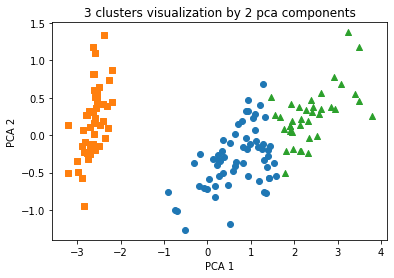

In [ ]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시.
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 pca components')
plt.show()

>**군집화 알고리즘 테스트를 위한 데이터 생성**

대표적인 군집화용 데이터 생성기 make_blobs()와 make_classification(). 

**make_blobs()**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts=np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
# DF로 변환하자

import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


- make_blobs()로 만든 피처 데이터 세트가 어떤 군집화 분포를 가지고 만들어졌는지 확인해보자.

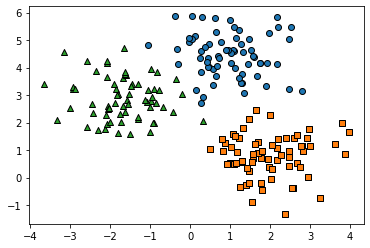

In [ ]:
target_list=np.unique(y)
#각 타깃별 산점도 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1. target==2로 산점도를 마커별로 생성
for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

- 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화해보자.

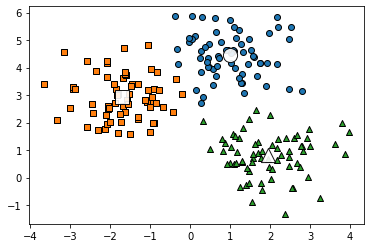

In [ ]:
#KMeans 객체를 이용해 X 데이터를 K-means 클러스터링 수행
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker=''%label)

plt.show()


- 대부분 잘 매핑되었다.

##군집 평가
붓꽃 데이터 세트는 타깃 레이블이 있었고 군집화 결과를 비교해서 결과를 평가할 수 있었지만 대부분의 군집화 데이터 세트는 이렇게 비교할 만한 타깃 레이블이 없다. 그렇다면 군집화가 얼마나 잘 되었는지 확인하는 방법은? 정확하게 평가하긴 어렵지만 보통 **실루엣 분석** 이용.

실루엣 분석 : 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.

붓꽃 데이터 세트로 실습해보자.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
#군집별 평균 실루엣 계수 값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 그러나 전체 데이터의 평균 실루엣 계수 값이 높다고 반드시 최적의 군집 개수로 군집화가 잘 되었다고 보기는 어렵다. 평균의 특성.
- 시각화로 보면 좀 더 명확하다.

In [37]:
#시각화를 위한 부록 코드 visualize_silhouette(cluster_lists, X_features)

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

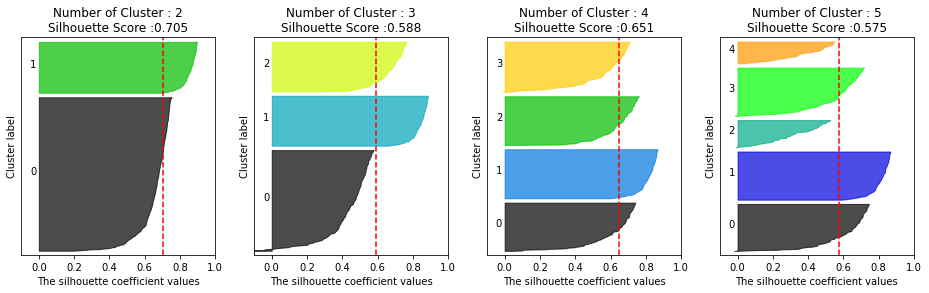

In [ ]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y=make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2,3,4,5개일 때 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

- 앞에서 봤던 것 처럼 역시 군집이 4개일 때 가장 좋아보인다.
- 이번엔 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수를 알아보자.

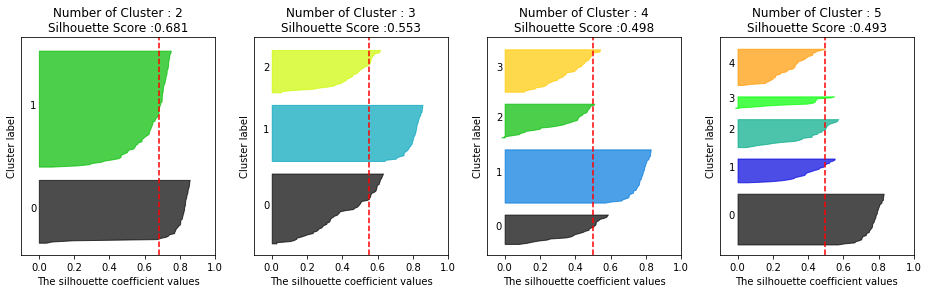

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

- 붓꽃 데이터는 군집을 2개로 하는 것이 좋아보인다.

##평균 이동
K-평균과 유사하나, K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동. KDE를 통해 찾아나간다.

make_blobs()의 cluster_std를 0.7로 정한 3개 군집의 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제를 보자.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 너무 세분화되었다. bandwidth를 조절해서 다시 해보자.

In [ ]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- bandwidth의 영향이 크다.
- 최적의 bandwidth 값을 찾기 위한 estimate_bandwidth() 함수가 제공된다.

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [ ]:
#이 값을 적용해 동일한 make_blobs() 데이터 세트에 군집화를 수행해보자.

import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

#estimate_bandwidth로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


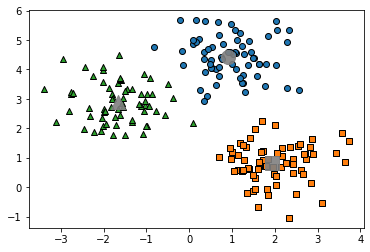

In [ ]:
#시각화해보자

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker=''%label)

plt.show()

In [ ]:
#target값과 군집 label 값도 잘 매칭된다.

print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균 이동은 유연한 군집화가 가능하지만 수행 시간과 bandwidth의 영향력 문제로 분석 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어나다.

##GMM (Gaussian Mixture Model)
여러개의 가우시안 분포=정규분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행하는 방식.

붓꽃 데이터 세트로 실습해보자. K-평균은 거리 기반이지만 GMM은 확률 기반 군집화이다. 두 방식을 비교해보자.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#좀더 편리한 데이터 핸들링 위해 DF로 변환
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

In [2]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

#target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- GMM 결과 대부분 잘 매핑되었으며, 앞의 K-mean보다 더 효과적이다.
- 하지만 이는 어떤 알고리즘이 더 뛰어나다는 뜻이 아니고, 붓꽃 데이터 세트가 GMM에 더 효과적이라는 것. K-평균은 개별 군집 내 데이터가 원형으로 흩어져 있는 경우 매우 효과적일 것이다.
- 만약 데이터가 타원형으로 늘어선 경우 어떻게 될까? make_blobs()로 만들어보고 GMM과 K-평균 비교해보자.

In [3]:
#필요한 함수 visualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=True) 먼저 정의해주자. 부록 참고.

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

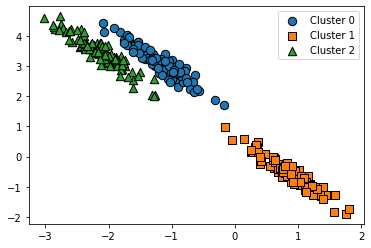

In [5]:
#데이터 만들기

from sklearn.datasets import make_blobs

#make_blob로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5로 만듦.
X, y=make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation=[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso=np.dot(X, transformation)
#feature 데이터 세트와 make_blobs()의 y 결과값을 dF로 저장
clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
#생성된 데이터 세트를 타깃별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

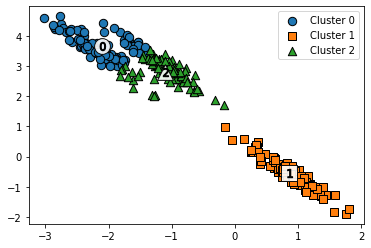

In [8]:
# K-means를 보자

#3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans=KMeans(3, random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

- K-means로 군집화를 수행하니 원형 영역 위치로 군집화가 진행되어 원하는 방향으로 구성되지 않음.

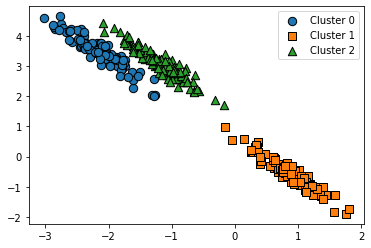

In [9]:
# GMM으로 수행해보자

#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

#GMM은 cluster_centers_속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

- GMM이 훨씬 낫다!
- GMM은 KMeans보다 유연하지만 수행시간이 길다는 단점이 있다.

##DBSCAN
밀도 기반 군집화의 대표적인 알고리즘. 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능. ex) 내부 원과 외부 원 모양의 데이터. 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하며 군집화를 구성하는 방식. 

붓꽃 데이터로 실습해보자.

In [10]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- -1 레이블 : 노이즈, 따라서 위 데이터는 0과 1로 군집화된 것.
- DBSCAN 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 시각화해보자.

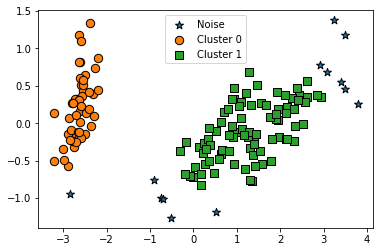

In [11]:
from sklearn.decomposition import PCA
#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- DBSCAN을 적용할 때는 특정 군집 개수로 강제하지 않는 것이 좋다.
- eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


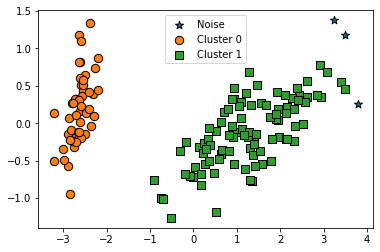

In [13]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [16]:
# eps를 0.6으로 유지하고 min_samples를 16으로 늘려보자

dbscan=DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


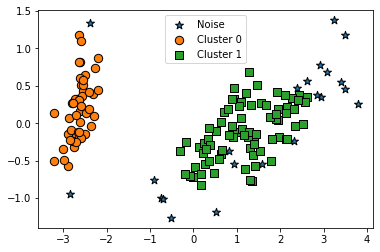

In [17]:
from sklearn.cluster import DBSCAN

dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 증가
- 이제는 DBSCAN과 다른 알고리즘을 비교해보자. make_circles 이용.

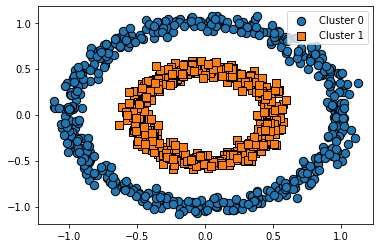

In [20]:
from sklearn.datasets import make_circles

X, y=make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

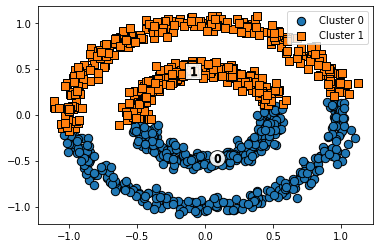

In [22]:
# KMeans로 수행해보자.

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

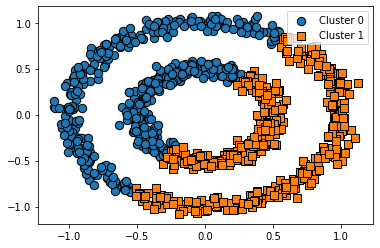

In [23]:
# GMM으로 수행해보자

from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

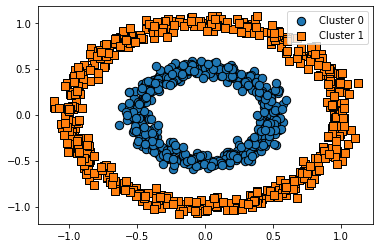

In [25]:
# DBSCAN 으로 수행해보자

from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

##군집화 실습 - 고객 세그먼테이션

In [27]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df=pd.read_excel('Online Retail.xlsx')

- 데이터를 살펴보니 CustomerID의 null 값이 너무 많고, 다른 칼럼도 오류 데이터가 존재.

In [28]:
#quantity, unitprice >0, customerID가 null 아닌 값만 필터링

retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- 이제 null 값은 없다.
- 한 가지 더, 주문 고객 국가가 영국이 대다수이므로 다른 국가는 제외

In [29]:
retail_df=retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


**RFM 기반 데이터 가공**

In [30]:
#quantity와 unitprice 곱해서 주문 금액 데이터를 만들자
#customerNo도 편리한 식별을 위해 float형을 int형으로 변경

retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

- 이 데이터는 개인 고객과 소매점의 주문이 함께 포함되어 주문 횟수와 주문 금액이 압도적으로 특성 고객에게 많은 특성이 있다.
- RFM 기반 고객 세그먼테이션은 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 세그먼테이션을 수행하는 것. 이에 주문번호+상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경하자.

In [31]:
#DF의 groupby()의 multiple 연산을 위해 agg() 이용
#Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
#Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations={
    'InvoiceDate':'max',
    'InvoiceNo':'count',
    'sale_amount':'sum'
    }
cust_df=retail_df.groupby('CustomerID').agg(aggregations)
#groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df=cust_df.rename(columns={'InvoiceDate':'Recency',
                                'InvoiceNo':'Frequency',
                                'sale_amount':'Monetary'})
cust_df=cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [32]:
# 최근 주문 날짜인 recency를 가공하자

import datetime as dt

cust_df['Recency']=dt.datetime(2011, 12, 10)-cust_df['Recency']
cust_df['Recency']=cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


**RFM 기반 고객 세그먼테이션**

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

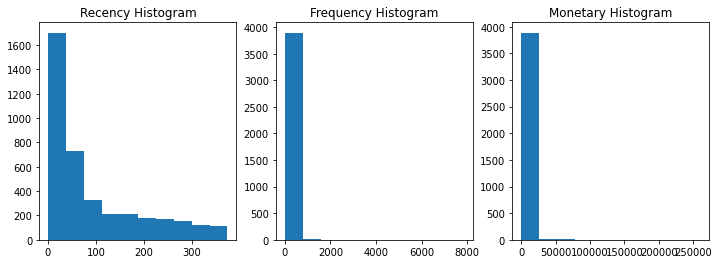

In [33]:
#앞에서 언급한대로 비대칭적인 데이터임.

fig, (ax1, ax2, ax3)=plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

- 왜곡 정도가 높은 데이터 세트에 K-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행된다.

In [34]:
# 변별력 떨어지는 K-means 수행해보자

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features=cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3, random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.592


In [35]:
#시각화에 필요한 함수 먼저 정의하고 가자. 부록 참고.

def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

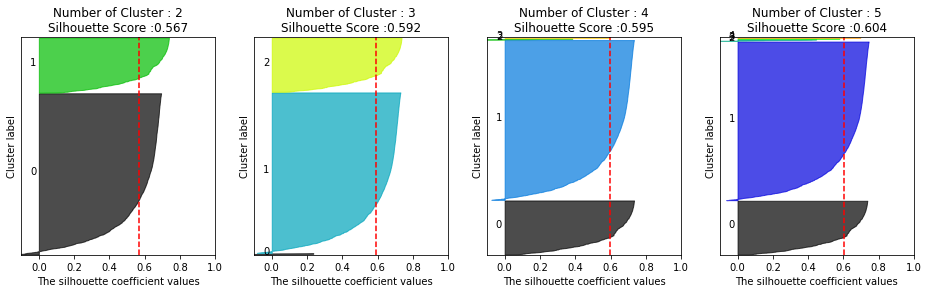

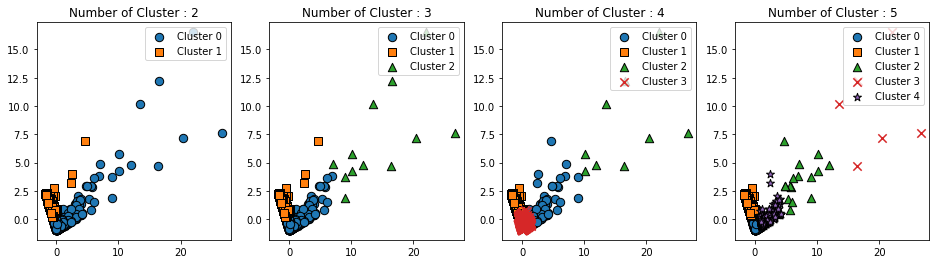

In [38]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

- 군집을 늘려봐야 의미 없다.
- 로그 변환하고 K-평균을 적용해보자.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#Recency, Frequency, Monetary 칼럼에 np.log1p()로 로그 변환
cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']=np.log1p(cust_df['Monetary'])

#로그 변환 데이터에 standardscaler 적용
X_features=cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3, random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.303


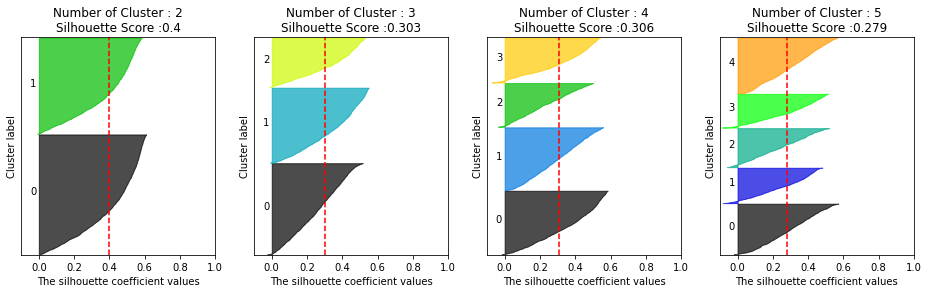

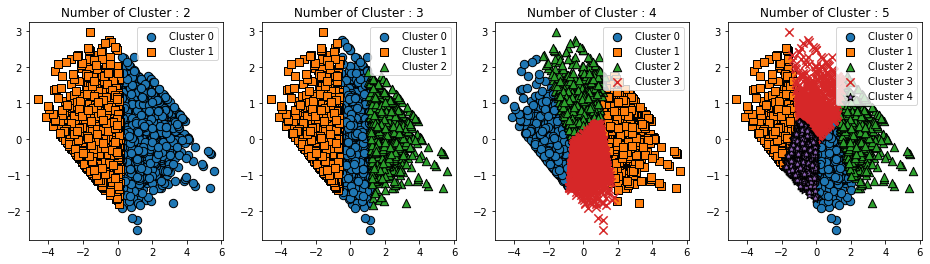

In [40]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

- 실루엣 계수는 떨어졌지만 역시 중요한 건 실루엣 계수의 절대치가 아님.
- 시각화 결과를 보니 로그 변환이 더 균일한 군집화를 진행 할 수 있다.